In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('car price.csv')
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company Name         46022 non-null  object
 1   Model Name           46022 non-null  object
 2   Price                46022 non-null  int64 
 3   Model Year           46022 non-null  int64 
 4   Location             46022 non-null  object
 5   Mileage              46022 non-null  int64 
 6   Engine Type          46022 non-null  object
 7   Engine Capacity      46022 non-null  int64 
 8   Color                46022 non-null  object
 9   Assembly             46022 non-null  object
 10  Body Type            46022 non-null  object
 11  Transmission Type    46022 non-null  object
 12  Registration Status  46022 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.6+ MB


In [4]:
data.describe()

,Price,Model Year,Mileage,Engine Capacity
count,4.602200e+04,46022.000000,46022.000000,46022.000000
mean,2.014153e+06,2011.035374,90965.128243,1313.115575
std,2.939071e+06,6.399403,63656.656034,614.690832
min,1.110000e+05,1990.000000,1.000000,16.000000
25%,8.500000e+05,2007.000000,48899.500000,1000.000000
50%,1.450000e+06,2013.000000,80000.000000,1300.000000
75%,2.300000e+06,2016.000000,120000.000000,1500.000000
max,7.750000e+07,2019.000000,999999.000000,6600.000000


In [5]:
data.isna().sum()

Company Name           0
Model Name             0
Price                  0
Model Year             0
Location               0
Mileage                0
Engine Type            0
Engine Capacity        0
Color                  0
Assembly               0
Body Type              0
Transmission Type      0
Registration Status    0
dtype: int64

In [6]:
x = data
y = data['Price']
categorical = pd.DataFrame()

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label = LabelEncoder()
for i in x.columns:
    if(x[i].dtype == 'object'):
        x[i] = label.fit_transform(x[i])
        categorical[i] = x[i]
categorical

,Company Name,Model Name,Location,Engine Type,Color,Assembly,Body Type,Transmission Type,Registration Status
0,28,181,1,2,18,0,1,0,1
1,28,53,2,2,21,1,4,0,0
2,27,14,2,2,21,1,1,0,1
3,27,14,4,2,21,1,1,1,0
4,28,53,1,2,2,1,4,1,0
...,...,...,...,...,...,...,...,...,...
46017,10,179,4,2,2,0,0,0,1
46018,28,15,4,2,3,0,1,0,1
46019,10,49,4,2,2,1,4,0,0
46020,28,15,4,2,2,0,1,0,0


In [9]:
x.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,28,181,2385000,2017,1,9869,2,1000,18,0,1,0,1
1,28,53,111000,2019,2,11111,2,1300,21,1,4,0,0
2,27,14,1530000,2019,2,17500,2,660,21,1,1,0,1
3,27,14,1650000,2019,4,9600,2,660,21,1,1,1,0
4,28,53,1435000,2010,1,120000,2,1300,2,1,4,1,0


<Axes: >

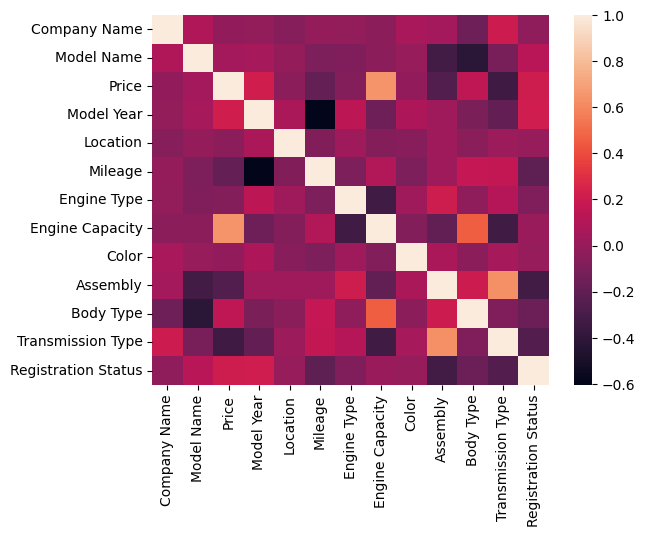

In [10]:
sns.heatmap(x.corr())

In [11]:
from scipy import stats

for i in categorical.columns:
    stats.pointbiserialr(categorical[i], y)
    print(i +' '+ str(stats.pointbiserialr(categorical[i], y)[0]))

Company Name -0.016978883870463708
Model Name 0.05295240961349673
Location -0.037541126409670715
Engine Type -0.07018277871672803
Color -0.019180239375343737
Assembly -0.2635707131945193
Body Type 0.15163163584268283
Transmission Type -0.33752101776783133
Registration Status 0.20530575750528127


In [12]:
x.drop(columns=['Company Name','Model Name','Location','Engine Type','Color'],inplace=True)
x.head()

,Price,Model Year,Mileage,Engine Capacity,Assembly,Body Type,Transmission Type,Registration Status
0,2385000,2017,9869,1000,0,1,0,1
1,111000,2019,11111,1300,1,4,0,0
2,1530000,2019,17500,660,1,1,0,1
3,1650000,2019,9600,660,1,1,1,0
4,1435000,2010,120000,1300,1,4,1,0


<Axes: >

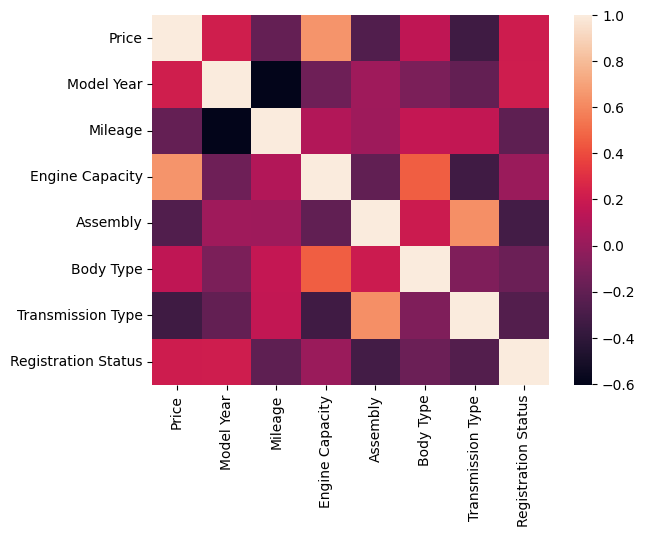

In [13]:
sns.heatmap(x.corr())

In [14]:
x.drop(columns=['Price'],inplace = True)

In [15]:
x.head()

,Model Year,Mileage,Engine Capacity,Assembly,Body Type,Transmission Type,Registration Status
0,2017,9869,1000,0,1,0,1
1,2019,11111,1300,1,4,0,0
2,2019,17500,660,1,1,0,1
3,2019,9600,660,1,1,1,0
4,2010,120000,1300,1,4,1,0


In [16]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
linearVar = [['Mileage','Engine Capacity']]
x[['Mileage','Engine Capacity']] = scale.fit_transform(x[['Mileage','Engine Capacity']])

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
x = poly.fit_transform(x)

In [18]:
x

array([[ 1.00000000e+00,  2.01700000e+03, -1.27397533e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  2.01900000e+03, -1.25446420e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.01900000e+03, -1.15409654e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.00000000e+00,  2.01500000e+03,  5.34669014e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.01600000e+03, -4.86445041e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.01500000e+03, -2.19384442e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.4,random_state=100)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)
result = model.fit(xtrain,ytrain)

In [21]:
ypred = model.predict(xtest)

c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

<Axes: xlabel='Price', ylabel='Density'>

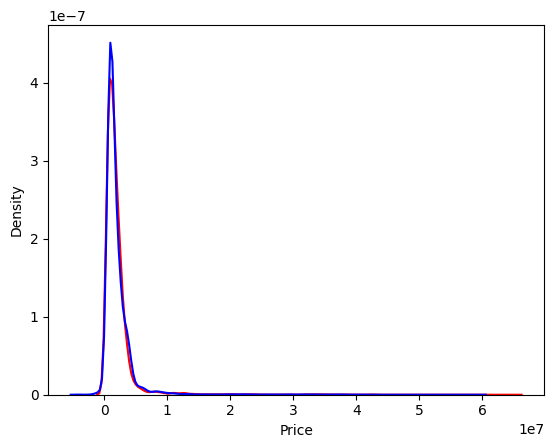

In [22]:
ax1 = sns.kdeplot(ytest, color = 'r', label = 'Actual Value')
sns.kdeplot(ypred, color = 'b', label = 'Fitted Value', ax = ax1)

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
resid = ytest - ypred
std_dev = np.std(resid)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
mae = mean_absolute_error(ytest,ypred)
r2 = r2_score(ytest,ypred)

In [24]:
print('Standard Deviation: ' + str(std_dev))
print('Root mean squared error: ' + str(rmse))
print('Mean absolute error: ' + str(mae))
print('R2 score: ' + str(r2))

Standard Deviation: 918008.7811945141
Root mean squared error: 918031.6262884506
Mean absolute error: 376554.719347649
R2 score: 0.9018832506138211
